# **Projeto: Previsão de Intenção de Compra de Clientes em Loja Web**

**Descrição do Projeto**

Neste projeto, nosso objetivo é criar um sistema inteligente para antecipar a intenção de compra dos clientes em um site de e-commerce. Imagine poder prever quais clientes têm maior probabilidade de realizar compras online, com base em suas características e comportamentos passados. Essa capacidade de prever a intenção de compra não só aprimorará a experiência do cliente, mas também permitirá que a empresa direcione seus esforços de marketing de forma mais eficaz.

**Objetivo**

Queremos desenvolver um modelo preditivo capaz de analisar os padrões de comportamento dos clientes e identificar sinais que indicam a propensão deles para realizar compras no site da empresa. Para isso, vamos usar uma base de dados que contém informações detalhadas sobre os clientes, incluindo:

Dados demográficos (idade, renda, etc.)

Informações sobre compras anteriores



# Base de dados:

Year_Birth: Ano de nascimento do cliente.

Education: Nível de escolaridade do cliente.

Marital_Status: Estado civil do cliente.

Income: Renda anual da família do cliente.

Kidhome: Número de crianças na casa do cliente.

Recency: Número de dias desde a última compra do cliente.

Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.

MntWines: Valor gasto em vinhos nos últimos 2 anos.

MntFruits: Valor gasto em frutas nos últimos 2 anos.

MntMeatProducts: Valor gasto em carnes nos últimos 2 anos.

MntFishProducts: Valor gasto em peixes nos últimos 2 anos.

MntSweetProducts: Valor gasto em doces nos últimos 2 anos.

MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos.

NumDealsPurchases: Número de compras feitas com desconto

NumStorePurchases: Número de compras feitas diretamente nas lojas.

NumWebVisitsMonth: Número de visitas ao site da empresa no último mês.






**WebPurchases: Número de compras feitas pelo site da empresa.**

# ETAPA 1:

**Preparação dos Dados**

**Exploração e Limpeza:** Analisar e limpar os dados para garantir que estejam prontos para a modelagem.

**Análise:** Construa uma storytelling com gráficos, analisando e retirando insights das informações.

In [49]:
import pandas as pd


In [50]:
base = pd.read_csv('marketing_campaign.csv', delimiter=';')
base.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
0,1957,Graduation,Single,58138.0,0,58,635,88,546,172,88,88,4,7,0,1
1,1954,Graduation,Single,46344.0,1,38,11,1,6,2,1,6,2,5,0,0
2,1965,Graduation,Together,71613.0,0,26,426,49,127,111,21,42,10,4,0,1
3,1984,Graduation,Together,26646.0,1,26,11,4,20,10,3,5,4,6,0,0
4,1981,PhD,Married,58293.0,1,94,173,43,118,46,27,15,6,5,0,1
5,1967,Master,Together,62513.0,0,16,520,42,98,0,42,14,10,6,0,1
6,1971,Graduation,Divorced,55635.0,0,34,235,65,164,50,49,27,7,6,0,1
7,1985,PhD,Married,33454.0,1,32,76,10,56,3,1,23,4,8,0,1
8,1974,PhD,Together,30351.0,1,19,14,0,24,3,3,2,2,9,0,0
9,1950,PhD,Together,5648.0,1,68,28,0,6,1,1,13,0,20,0,0


# ETAPA 2:
**Pré-processamento**

**Análise Correlação:** Verifique a correlação entre as váriaveis e análise se há espaço para retirar váriaveis que não te parecem importantes.

**Codificação de Variáveis Categóricas:** Transformar variáveis categóricas em um formato que os modelos de machine learning possam interpretar.


**Separe a base em Y, X e Treino e teste:**: Faça a separação da base.

**Realize a padronização dos dados**: Padronize os dados para garantir eficiência no modelo e eficácia.








**1 Etapa** - Analise de dados e tratamento dos dados.

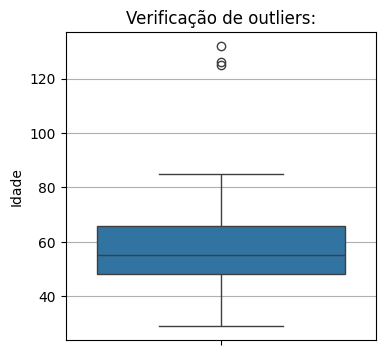

In [52]:
# Excluir outliers de idade, vamos criar a coluna e depois tratar os outliers de Idade

# Criei uma coluna de idade, pra no futuro utilizar nas analises e testes de correlação

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


ano_atual = datetime.now().year

base['Idade'] =  ano_atual - base['Year_Birth']

plt.figure(figsize=(4,4))
sns.boxplot(y=base['Idade'])
plt.title(f'Verificação de outliers:')
plt.grid(True, axis='y')

In [53]:
base['Idade'].unique()

array([ 68,  71,  60,  41,  44,  58,  54,  40,  51,  75,  42,  49,  66,
        73,  38,  79,  45,  76,  43,  46,  74,  56,  39,  36,  62,  55,
        52,  82,  50,  29,  57,  61,  48,  47,  70,  59,  37,  77,  67,
        53,  65,  80,  34,  63,  72,  64,  69,  33, 125, 132,  35,  78,
       126,  32,  31,  84,  81,  30,  85])

Aqui verifiquei que tinha algumas idades acima normal, sendo assim vou filtrar elas.

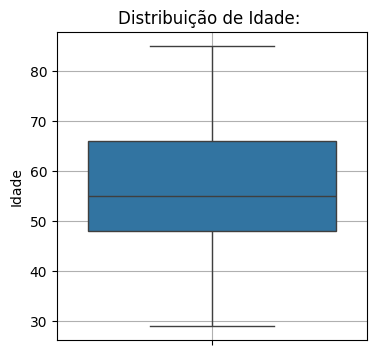

In [54]:
base = base.loc[base['Idade'] < 100] 


plt.figure(figsize=(4,4))
sns.boxplot(y=base['Idade'])
plt.title('Distribuição de Idade: ')
plt.grid(True)
plt.show()

In [55]:


# seu código aqui
base.info()
base.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2237 non-null   int64  
 1   Education          2237 non-null   object 
 2   Marital_Status     2237 non-null   object 
 3   Income             2213 non-null   float64
 4   Kidhome            2237 non-null   int64  
 5   Recency            2237 non-null   int64  
 6   MntWines           2237 non-null   int64  
 7   MntFruits          2237 non-null   int64  
 8   MntMeatProducts    2237 non-null   int64  
 9   MntFishProducts    2237 non-null   int64  
 10  MntSweetProducts   2237 non-null   int64  
 11  MntGoldProds       2237 non-null   int64  
 12  NumStorePurchases  2237 non-null   int64  
 13  NumWebVisitsMonth  2237 non-null   int64  
 14  Complain           2237 non-null   int64  
 15  WebPurchases       2237 non-null   int64  
 16  Idade              2237 non-n

Year_Birth            0
Education             0
Marital_Status        0
Income               24
Kidhome               0
Recency               0
MntWines              0
MntFruits             0
MntMeatProducts       0
MntFishProducts       0
MntSweetProducts      0
MntGoldProds          0
NumStorePurchases     0
NumWebVisitsMonth     0
Complain              0
WebPurchases          0
Idade                 0
dtype: int64

In [56]:
basedrop = base.dropna()
basedrop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2213 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2213 non-null   int64  
 1   Education          2213 non-null   object 
 2   Marital_Status     2213 non-null   object 
 3   Income             2213 non-null   float64
 4   Kidhome            2213 non-null   int64  
 5   Recency            2213 non-null   int64  
 6   MntWines           2213 non-null   int64  
 7   MntFruits          2213 non-null   int64  
 8   MntMeatProducts    2213 non-null   int64  
 9   MntFishProducts    2213 non-null   int64  
 10  MntSweetProducts   2213 non-null   int64  
 11  MntGoldProds       2213 non-null   int64  
 12  NumStorePurchases  2213 non-null   int64  
 13  NumWebVisitsMonth  2213 non-null   int64  
 14  Complain           2213 non-null   int64  
 15  WebPurchases       2213 non-null   int64  
 16  Idade              2213 non-n

In [57]:
basedrop.describe()

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases,Idade
count,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000
mean,1968.917307,52236.581563,0.441934,49.007682,305.153638,26.323995,166.962494,37.635337,27.034794,43.911432,5.805242,5.321735,0.009038,0.504745,56.082693
std,11.700216,25178.603047,0.536965,28.941864,337.305490,39.735932,224.226178,54.763278,41.085433,51.699746,3.250752,2.425092,0.094657,0.500090,11.700216
min,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,1959.000000,35246.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,3.000000,3.000000,0.000000,0.000000,48.000000
50%,1970.000000,51373.000000,0.000000,49.000000,175.000000,8.000000,68.000000,12.000000,8.000000,24.000000,5.000000,6.000000,0.000000,1.000000,55.000000
75%,1977.000000,68487.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,8.000000,7.000000,0.000000,1.000000,66.000000
max,1996.000000,666666.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,13.000000,20.000000,1.000000,1.000000,85.000000


Observando colunas com possiveis Outliers, colunas: Income, MntWines, MntFruits, MntMeatProducts, MntFishProdutcts, MntSweetProducts, MntGoldProds, NumWebVisitsMonth,

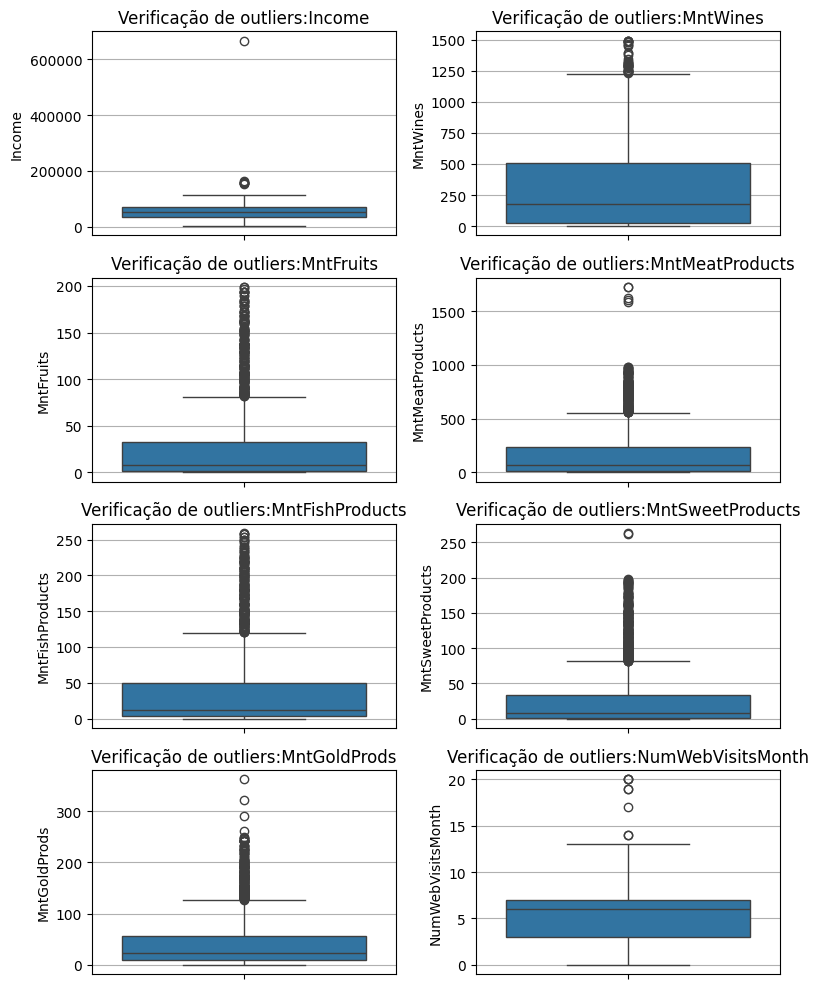

In [58]:
#Visualisar com gráficos os possiveis outliers. 
import matplotlib.pyplot as plt
import seaborn as sns

colunas = [
    'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumWebVisitsMonth'
]

plt.figure(figsize=(8,10))

for i, coluna in enumerate(colunas,1):
    plt.subplot(4,2,i) # 4 linhas(x), 2 colunas(y)
    sns.boxplot(y=base[coluna])
    plt.title(f'Verificação de outliers:{coluna}')
    plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

Aqui vou analisar quais colunas possui mais outliers, verificar a proporção desses outliers em nossa base, se for baixa vou criar uma base nova removendo esses outliers, se for alto, vou balancear com StandardSCaler 

In [59]:
def conta_outliers(col):
    Q1 = basedrop[col].quantile(0.25)
    Q3 = basedrop[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    return ((basedrop[col] < lim_inf) | (basedrop[col] > lim_sup)).sum()

outliers_por_coluna = {col: conta_outliers(col) for col in colunas}
outliers_por_coluna


{'Income': np.int64(8),
 'MntWines': np.int64(35),
 'MntFruits': np.int64(245),
 'MntMeatProducts': np.int64(173),
 'MntFishProducts': np.int64(222),
 'MntSweetProducts': np.int64(246),
 'MntGoldProds': np.int64(204),
 'NumWebVisitsMonth': np.int64(8)}

Aqui a ideia é tratar a coluna que possui a maior quantidade de outliers (MntSweetProducts) e depois proporcionar os dados restantes com StardScaler

In [60]:
Q1 = basedrop['MntSweetProducts'].quantile(0.25)
Q3 = basedrop['MntSweetProducts'].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

base_outliers = basedrop[
    (basedrop['MntSweetProducts'] >= lim_inf) &
    (basedrop['MntSweetProducts'] <= lim_sup)
]


base_outliers.info()

print("Original:", basedrop.shape[0], "-> filtrado (sem outliers):", base_outliers.shape[0])
proporção = (basedrop.shape[0] - base_outliers.shape[0]) / basedrop.shape[0]*100
print(f'Porcentagem de dados filtrados: % {proporção:.2f}')

<class 'pandas.core.frame.DataFrame'>
Index: 1967 entries, 1 to 2239
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         1967 non-null   int64  
 1   Education          1967 non-null   object 
 2   Marital_Status     1967 non-null   object 
 3   Income             1967 non-null   float64
 4   Kidhome            1967 non-null   int64  
 5   Recency            1967 non-null   int64  
 6   MntWines           1967 non-null   int64  
 7   MntFruits          1967 non-null   int64  
 8   MntMeatProducts    1967 non-null   int64  
 9   MntFishProducts    1967 non-null   int64  
 10  MntSweetProducts   1967 non-null   int64  
 11  MntGoldProds       1967 non-null   int64  
 12  NumStorePurchases  1967 non-null   int64  
 13  NumWebVisitsMonth  1967 non-null   int64  
 14  Complain           1967 non-null   int64  
 15  WebPurchases       1967 non-null   int64  
 16  Idade              1967 non-n

Aqui vou filtrar alguns outliers, e depois vou modelar da melhor maneira

In [61]:
#Transformar a tabela toda em numerica

colunas_categoricas = base_outliers.select_dtypes(include=['object', 'category']).columns.tolist()


df_dummies = pd.get_dummies(
    base_outliers,
    columns=colunas_categoricas,
    drop_first=True  # evita multicolinearidade
)

df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1967 entries, 1 to 2239
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               1967 non-null   int64  
 1   Income                   1967 non-null   float64
 2   Kidhome                  1967 non-null   int64  
 3   Recency                  1967 non-null   int64  
 4   MntWines                 1967 non-null   int64  
 5   MntFruits                1967 non-null   int64  
 6   MntMeatProducts          1967 non-null   int64  
 7   MntFishProducts          1967 non-null   int64  
 8   MntSweetProducts         1967 non-null   int64  
 9   MntGoldProds             1967 non-null   int64  
 10  NumStorePurchases        1967 non-null   int64  
 11  NumWebVisitsMonth        1967 non-null   int64  
 12  Complain                 1967 non-null   int64  
 13  WebPurchases             1967 non-null   int64  
 14  Idade                    1967

In [62]:
x = df_dummies.drop(columns=['WebPurchases'])
y = df_dummies['WebPurchases']

from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(x)





,n_components,10
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


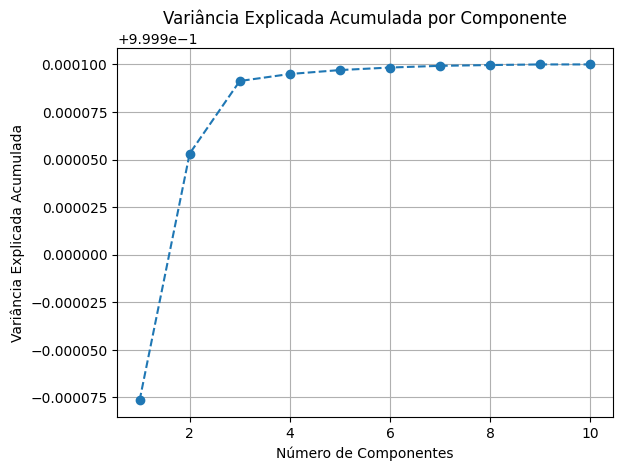

In [63]:
# Variância explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Variância explicada acumulada
cumulative_variance = explained_variance.cumsum()

# Plotando a variância explicada acumulada
plt.plot(range(1, 11), cumulative_variance, marker='o', linestyle='--')
plt.title('Variância Explicada Acumulada por Componente')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.grid(True)
plt.show()


Pelo gráfico acima, conseguimos perceber que existem 3 componentes principais que explicam mais de 95% dos dados, tornando viavel a redução de dimensionalidade pra deixar o modelo mais leve e rápido. 

In [64]:
pca3 = PCA(n_components=3)

pca3.fit(x)

,n_components,3
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


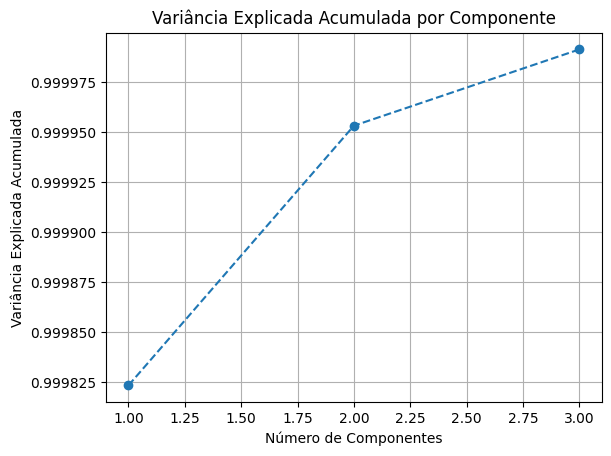

In [65]:
# Variância explicada por cada componente
explained_variance = pca3.explained_variance_ratio_

# Variância explicada acumulada
cumulative_variance = explained_variance.cumsum()

# Plotando a variância explicada acumulada
plt.plot(range(1, 4), cumulative_variance, marker='o', linestyle='--')
plt.title('Variância Explicada Acumulada por Componente')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.grid(True)
plt.show()


# ETAPA 3:

**Modelagem**

Escolha ao menos 2 técnicas de machine learning e rode 2 modelos, afim de identificar qual tem o melhor resultado para essa base. Lembrando que estamos lidando com uma classificação binária.

In [66]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

x_pca = pca3.fit_transform(x) #Cola - Fit_transform transforma em arrays pra serem armezandas na variavel.

#Criei um pipeline para padronizar, balancear e treinar, cada fold do cross validation
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=1)),
    ('model', RandomForestClassifier(n_estimators=100, random_state=1))
])



In [68]:
#Configuração do cross validation
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

#Executar o Cross validation 
from sklearn.model_selection import cross_validate

scores = cross_validate(
    pipeline,
    x_pca,
    y,
    cv=cv,
    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
)


modelo_rf = pd.DataFrame(scores).mean()
pd.DataFrame(scores).mean()


fit_time          0.199725
score_time        0.024602
test_accuracy     0.879515
test_precision    0.840434
test_recall       0.913035
test_f1           0.874841
test_roc_auc      0.942107
dtype: float64

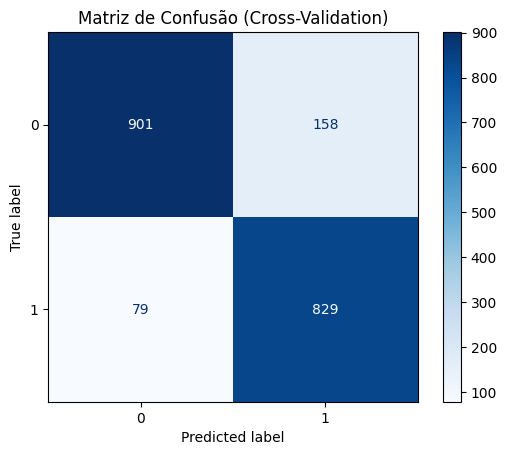

In [69]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_cv = cross_val_predict(
    pipeline,
    x_pca,
    y,
    cv=cv
)

cm = confusion_matrix(y, y_pred_cv)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão (Cross-Validation)')
plt.show()

Interpretação do gráfico - "Matriz de confusão" Aqui o modelo classificou 901 verdadeiro negativo(0), 158 falso negativo(1) | 79 falso positivo, 829 verdadeiro positivo.

In [70]:
from sklearn.tree import DecisionTreeClassifier


pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=1)),
    ('model', DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=4))
])

In [71]:

scores = cross_validate(
    pipeline,
    x_pca,
    y,
    cv=cv,
    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
)

modelo_dt = pd.DataFrame(scores).mean()
pd.DataFrame(scores).mean()



fit_time          0.008035
score_time        0.008274
test_accuracy     0.860707
test_precision    0.807428
test_recall       0.918530
test_f1           0.859099
test_roc_auc      0.896482
dtype: float64

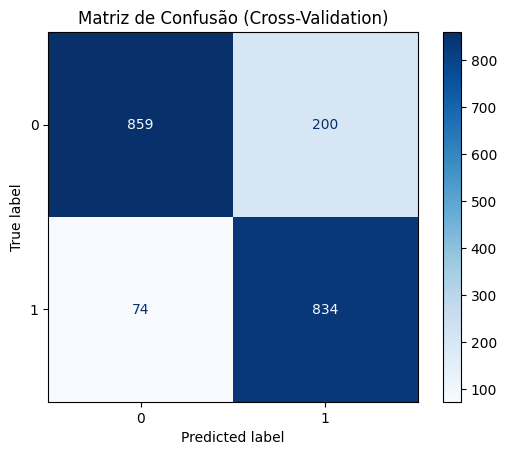

In [72]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred_cv = cross_val_predict(
    pipeline,
    x_pca,
    y,
    cv=cv
)

cm = confusion_matrix(y, y_pred_cv)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão (Cross-Validation)')
plt.show()

Interpretação do gráfico "matriz de confusão" -  O modelo classificou 859 Verdadeiros negativos, 200 falsos negativos | 74 falos positivos, 834 verdadeiros positivos, Um bom resultado, 

# ETAPA 4:

**Avaliação**

Avalie os resultados encontrados nos dois modelos e identifique qual te pareceu realizar melhor as previsões.

Utilize além das métricas padrões a matriz de confusão.

In [73]:
# seu código aqui
teste = modelo_rf - modelo_dt
teste

fit_time          0.191690
score_time        0.016328
test_accuracy     0.018808
test_precision    0.033006
test_recall      -0.005495
test_f1           0.015742
test_roc_auc      0.045625
dtype: float64

Aqui vejo que o modelo Random Forest apresenta melhores resultados em relação ao modelo Decision Tree. 